<a href="https://colab.research.google.com/github/kkmin1/Home/blob/master/%EB%AF%B8%EB%B6%84%EB%B0%A9%EC%A0%95%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy as sy

x = sy.symbols('x')
f = sy.symbols('f',cls=sy.Function)
y = f(x)
eq = sy.Eq(sy.diff(y,x,2)+3*y-1,0)

eq

sy.dsolve(eq,y)

Eq(f(x), C1*sin(sqrt(3)*x) + C2*cos(sqrt(3)*x) + 1/3)

Step is 0.1


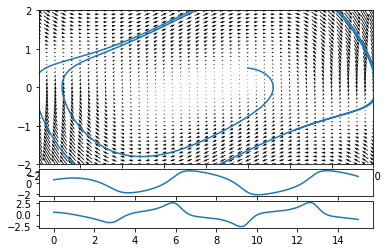

In [3]:
import numpy as np

import matplotlib.pyplot as plt



def xftn(x, y):

	return y



def yftn(x, y):

	tmp = -x + y*(1-x*x)

	return tmp



def xRK4(x, y, dt):

    k1 = dt * xftn(x, y)

    k2 = dt * xftn(x + 0.5*k1, y + 0.5*k1)

    k3 = dt * xftn(x + 0.5*k2, y + 0.5*k2)

    k4 = dt * xftn(x + k3, y + k3)



    result = x + k1 / 6 + k2 / 3 + k3 / 3 + k4 / 6



    return result



def yRK4(x, y, dt):

    k1 = dt * yftn(x, y)

    k2 = dt * yftn(x + 0.5*k1, y + 0.5*k1)

    k3 = dt * yftn(x + 0.5*k2, y + 0.5*k2)

    k4 = dt * yftn(x + k3, y + k3)



    result = y + k1 / 6 + k2 / 3 + k3 / 3 + k4 / 6



    return result





Step	= 0.1

xLeft	= -2

xRight	= 2

yTop	= 2

yBottom = -2



SIZE = (int)((xRight-xLeft)/Step) + 1  #We only think square plane.



print("Step is", Step)



x = np.empty((SIZE,SIZE), float)

y = np.empty((SIZE,SIZE), float)



u = np.empty((SIZE,SIZE), float)

v = np.empty((SIZE,SIZE), float)



for i in range(SIZE):

	for j in range(SIZE):

		x[i][j] = xLeft + Step*i

		y[i][j] = yBottom + Step*j

		u[i][j] = xftn(x[i][j], y[i][j])

		v[i][j] = yftn(x[i][j], y[i][j])



xPointList = [0.5]

yPointList = [0.5]

timeList   = [0]



dt = 0.01



for i in range(1500):

	xPointList.append(xRK4(xPointList[i], yPointList[i], dt))

	yPointList.append(yRK4(xPointList[i], yPointList[i], dt))

	timeList.append(timeList[i]+dt)



ax1 = plt.subplot2grid((7,3), (0,0), rowspan=5, colspan=5)

ax1.quiver(x,y,u,v, angles='xy', pivot='middle')

ax1.plot(xPointList, yPointList)

plt.xlim(-2, 2)

plt.ylim(-2, 2)



ax2 = plt.subplot2grid((7,3), (5,0), colspan=3)

ax2.plot(timeList, xPointList)



ax3 = plt.subplot2grid((7,3), (6,0), colspan=3)

ax3.plot(timeList, yPointList)



plt.show()